## AWS Practicum Project - Earnings Call Transcripts Analysis

#### 1. Import Libraries

In [1]:
#Import libraries
%%capture
%pylab inline
import pandas as pd
import os
# !pip install ipypublish
# from ipypublish import nb_setup
# %load_ext rpy2.ipython

#Basic lines of code needed to import a data file with permissions from Google Drive
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/Shared drives/AWS Practicum/GitHub/Dataframe Merging and AutoGluon Modeling/') 

In [2]:
%%time
!pip install --upgrade pip
!pip install --upgrade setuptools
!pip install --upgrade "mxnet_cu110<2.0.0"
!pip install autogluon==0.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 4.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/p

In [3]:
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split

#### 2. Read the merged data frame

In [4]:
# Read data
df = pd.read_csv('finaldf.csv') 
df.shape

(3801, 117)

In [5]:
#set options to display all the columns
pd.set_option('display.max_columns', None)

In [6]:
df = df.drop(columns = ['Unnamed: 0','transcript_name','ticker','id','index','company_name','price','RET_percentage','return','mkt','RET_normal'])

In [7]:
#Sort by date
df_datesort = df.sort_values(by=['date'])
df_datesort.head(2)

,date,clean_text,ret_normal_d-15,ret_normal_d-14,ret_normal_d-13,ret_normal_d-12,ret_normal_d-11,ret_normal_d-10,ret_normal_d-9,ret_normal_d-8,ret_normal_d-7,ret_normal_d-6,ret_normal_d-5,ret_normal_d-4,ret_normal_d-3,ret_normal_d-2,ret_normal_d-1,ret_normal_d,ret_normal_d+1,ret_normal_d+2,ret_normal_d+3,ret_normal_d+4,ret_normal_d+5,ret_normal_d+6,ret_normal_d+7,ret_normal_d+8,ret_normal_d+9,ret_normal_d+10,ret_normal_d+11,ret_normal_d+12,ret_normal_d+13,ret_normal_d+14,ret_normal_d+15,return_mkt_d-15,return_mkt_d-14,return_mkt_d-13,return_mkt_d-12,return_mkt_d-11,return_mkt_d-10,return_mkt_d-9,return_mkt_d-8,return_mkt_d-7,return_mkt_d-6,return_mkt_d-5,return_mkt_d-4,return_mkt_d-3,return_mkt_d-2,return_mkt_d-1,return_mkt_d,return_mkt_d+1,return_mkt_d+2,return_mkt_d+3,return_mkt_d+4,return_mkt_d+5,return_mkt_d+6,return_mkt_d+7,return_mkt_d+8,return_mkt_d+9,return_mkt_d+10,return_mkt_d+11,return_mkt_d+12,return_mkt_d+13,return_mkt_d+14,return_mkt_d+15,return_d-15,return_d-14,return_d-13,return_d-12,return_d-11,return_d-10,return_d-9,return_d-8,return_d-7,return_d-6,return_d-5,return_d-4,return_d-3,return_d-2,return_d-1,return_d,return_d+1,return_d+2,return_d+3,return_d+4,return_d+5,return_d+6,return_d+7,return_d+8,return_d+9,return_d+10,return_d+11,return_d+12,return_d+13,return_d+14,return_d+15,positive,negative,certainty,uncertainty,risk,safe,litigious,fraud,sentiment,polarity,readability
1957,2011-01-13,Intel Corporation (NASDAQ:INTC) Q4 2010 Earnin...,-1.3907,-0.5737,-0.5258,-0.6492,0.6085,0.5837,-0.6480,-2.0359,1.6988,-1.5829,-0.6618,-0.3196,0.1652,1.350,0.3295,0.1113,-1.6764,-0.1681,0.8961,0.0044,-0.7305,1.3673,1.4395,0.3281,-0.2600,0.5467,-0.7100,-1.6578,0.6314,0.6258,0.2190,0.97,0.71,1.22,-0.27,0.06,-0.15,-0.31,1.18,-0.26,0.59,-0.15,-0.21,-0.02,0.39,0.87,-0.17,0.69,0.18,-1.24,-0.29,0.11,0.65,0.02,0.60,0.26,-1.88,0.710,1.751,-0.259,0.261,0.291,1.0134,-0.2211,1.2781,0.0168,0.6393,0.1003,0.1837,-0.8559,1.4388,-0.9929,-0.8118,-0.5296,0.1452,1.740,1.1995,-0.0587,-0.9864,0.0119,-0.3439,-0.2856,-0.6205,2.0173,1.4595,0.9281,0.0000,-1.3333,0.0000,0.0932,0.3724,0.8868,0.5100,0.077553,0.028424,0.026787,0.018833,0.028658,0.041642,0.016376,0.014505,0.108,0.463576,10.18
2662,2011-01-14,M&T Bank Corporation (NYSE:MTB) Q4 2010 Earnin...,-1.3487,1.0699,0.6009,1.0222,-0.4513,0.5350,-0.2036,-0.7639,0.5939,-0.4066,-0.6125,-0.8093,0.3301,-0.132,-1.0892,-0.5509,-0.3884,1.5764,-0.5887,1.1031,-1.1110,0.6863,-1.6347,0.7158,1.2242,-0.5710,-0.8258,-0.3712,-0.2841,0.6202,-0.1295,0.71,1.22,-0.27,0.06,-0.15,-0.31,1.18,-0.26,0.59,-0.15,-0.21,-0.02,0.39,0.87,-0.17,0.69,0.18,-1.24,-0.29,0.11,0.65,0.02,0.60,0.26,-1.88,0.71,1.751,-0.259,0.261,0.291,0.701,-0.2213,0.0000,0.2376,0.4345,-0.0079,NaN,0.9764,-1.0239,1.1839,-0.5566,-0.8225,-0.8293,0.7201,0.738,-1.2592,0.1391,-0.2084,0.3364,-0.8787,1.2131,-0.4610,0.7063,-1.0347,0.9758,-0.6558,0.1390,0.9252,-0.6302,-0.0231,0.9112,0.5715,0.080318,0.027825,0.032093,0.026545,0.025606,0.042591,0.024155,0.017924,0.089,0.485399,11.06


In [8]:
df=df.drop(columns=['date'])
df_datesort=df_datesort.drop(columns=['date'])

### Part 1 - Normalized Net Return Analysis

#### Prepare for the data frame

In [9]:
df.head(2)

,clean_text,ret_normal_d-15,ret_normal_d-14,ret_normal_d-13,ret_normal_d-12,ret_normal_d-11,ret_normal_d-10,ret_normal_d-9,ret_normal_d-8,ret_normal_d-7,ret_normal_d-6,ret_normal_d-5,ret_normal_d-4,ret_normal_d-3,ret_normal_d-2,ret_normal_d-1,ret_normal_d,ret_normal_d+1,ret_normal_d+2,ret_normal_d+3,ret_normal_d+4,ret_normal_d+5,ret_normal_d+6,ret_normal_d+7,ret_normal_d+8,ret_normal_d+9,ret_normal_d+10,ret_normal_d+11,ret_normal_d+12,ret_normal_d+13,ret_normal_d+14,ret_normal_d+15,return_mkt_d-15,return_mkt_d-14,return_mkt_d-13,return_mkt_d-12,return_mkt_d-11,return_mkt_d-10,return_mkt_d-9,return_mkt_d-8,return_mkt_d-7,return_mkt_d-6,return_mkt_d-5,return_mkt_d-4,return_mkt_d-3,return_mkt_d-2,return_mkt_d-1,return_mkt_d,return_mkt_d+1,return_mkt_d+2,return_mkt_d+3,return_mkt_d+4,return_mkt_d+5,return_mkt_d+6,return_mkt_d+7,return_mkt_d+8,return_mkt_d+9,return_mkt_d+10,return_mkt_d+11,return_mkt_d+12,return_mkt_d+13,return_mkt_d+14,return_mkt_d+15,return_d-15,return_d-14,return_d-13,return_d-12,return_d-11,return_d-10,return_d-9,return_d-8,return_d-7,return_d-6,return_d-5,return_d-4,return_d-3,return_d-2,return_d-1,return_d,return_d+1,return_d+2,return_d+3,return_d+4,return_d+5,return_d+6,return_d+7,return_d+8,return_d+9,return_d+10,return_d+11,return_d+12,return_d+13,return_d+14,return_d+15,positive,negative,certainty,uncertainty,risk,safe,litigious,fraud,sentiment,polarity,readability
0,Agilent Technologies (NYSE:A) F1Q11 Earnings C...,0.9173,-0.2071,-0.8811,-0.5419,-1.5829,1.3642,-1.2251,-1.6911,-0.8431,4.5882,2.6719,-1.0886,-1.3663,1.1915,1.6472,-0.8119,-4.3989,1.4761,0.4323,-0.1210,-1.0669,-4.0221,1.6895,1.7195,-1.0820,-1.7470,1.6374,1.5203,9.848,-0.9224,-0.7520,0.65,0.02,0.60,0.26,-1.88,0.71,1.751,-0.259,0.261,0.291,0.701,0.481,-0.309,0.121,0.671,0.301,-0.379,0.681,0.371,0.121,-2.189,-0.779,0.041,1.221,0.421,-1.58,0.28,1.76,-0.67,-0.96,0.97,1.5673,-0.1871,-0.2811,-0.2819,-3.4629,2.0742,0.5259,-1.9501,-0.5821,4.8792,3.3729,-0.6076,-1.6753,1.3125,2.3182,-0.5109,-4.7779,2.1571,0.8033,0.0000,-3.2559,-4.8011,1.7305,2.9405,-0.6610,-3.3270,1.9174,3.2803,9.178,-1.8824,0.2180,0.078651,0.020513,0.028291,0.014486,0.017305,0.041610,0.021291,0.013902,0.103,0.586275,8.83
1,Agilent Technologies (NYSE:A) Q2 2011 Earnings...,0.8791,-2.1910,1.6422,0.6153,0.2597,-1.1048,1.3419,0.8172,-1.4339,0.1533,0.6789,-0.2484,0.7238,-0.1731,0.0796,5.3505,0.2655,-2.0880,0.0744,-1.3219,-0.1691,-1.8658,-0.6950,0.2278,0.2348,-0.0648,-0.4956,-1.4197,0.475,-0.4567,0.3999,0.56,-0.16,0.89,0.66,0.32,0.29,-0.280,-0.500,-0.740,-0.820,0.460,0.550,0.860,-1.090,0.520,-0.880,-0.760,-0.110,1.020,0.220,-0.730,-1.290,-0.140,0.450,0.520,0.49,1.04,-2.33,-0.10,-1.10,-1.18,1.4391,-2.3510,2.5322,1.2753,0.5797,-0.8148,1.0619,0.3172,-2.1739,-0.6667,1.1389,0.3016,1.5838,-1.2631,0.5996,4.4705,-0.4945,-2.1980,1.0944,-1.1019,-0.8991,-3.1558,-0.8350,0.6778,0.7548,0.4252,0.5444,-3.7497,0.375,-1.5567,-0.7801,0.081197,0.020513,0.028205,0.014209,0.016560,0.042201,0.021474,0.016667,0.125,0.596639,8.14


In [10]:
df_norm = df.copy()
df_norm.drop(columns=['return_mkt_d','return_d'],inplace=True)

In [11]:
for i in range(1,16):
  df_norm.drop(columns = ['return_d+'+str(i),'return_d-'+str(i),'return_mkt_d+'+str(i),'return_mkt_d-'+str(i)],inplace=True)

In [12]:
#sum of normalized net return from day 0 to day 5
df_norm['norm_0to5'] =  df_norm['ret_normal_d'] + sum(df_norm['ret_normal_d+' + str(i)] for i in range(1,6))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


In [13]:
#sum of normalized net return from day 0 to day 10
df_norm['norm_0to10'] =  df_norm['ret_normal_d'] + sum(df_norm['ret_normal_d+' + str(i)] for i in range(1,11))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


In [14]:
#sum of normalized net return from day 0 to day 15
df_norm['norm_0to15'] =  df_norm['ret_normal_d'] + sum(df_norm['ret_normal_d+' + str(i)] for i in range(1,16))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


In [15]:
#drop normalized stock return from day 1 to day 15
for i in range(1,16):
  df_norm = df_norm.drop(columns = ['ret_normal_d+' + str(i)])

In [16]:
df_norm.head(2)

,clean_text,ret_normal_d-15,ret_normal_d-14,ret_normal_d-13,ret_normal_d-12,ret_normal_d-11,ret_normal_d-10,ret_normal_d-9,ret_normal_d-8,ret_normal_d-7,ret_normal_d-6,ret_normal_d-5,ret_normal_d-4,ret_normal_d-3,ret_normal_d-2,ret_normal_d-1,ret_normal_d,positive,negative,certainty,uncertainty,risk,safe,litigious,fraud,sentiment,polarity,readability,norm_0to5,norm_0to10,norm_0to15
0,Agilent Technologies (NYSE:A) F1Q11 Earnings C...,0.9173,-0.2071,-0.8811,-0.5419,-1.5829,1.3642,-1.2251,-1.6911,-0.8431,4.5882,2.6719,-1.0886,-1.3663,1.1915,1.6472,-0.8119,0.078651,0.020513,0.028291,0.014486,0.017305,0.041610,0.021291,0.013902,0.103,0.586275,8.83,-4.4903,-7.932401,3.398899
1,Agilent Technologies (NYSE:A) Q2 2011 Earnings...,0.8791,-2.1910,1.6422,0.6153,0.2597,-1.1048,1.3419,0.8172,-1.4339,0.1533,0.6789,-0.2484,0.7238,-0.1731,0.0796,5.3505,0.081197,0.020513,0.028205,0.014209,0.016560,0.042201,0.021474,0.016667,0.125,0.596639,8.14,2.1114,-0.051600,-1.548700


In [17]:
df_norm['ret_normal_d'] = df_norm['ret_normal_d'].apply(lambda x: 1 if x>=0 else 0)
print(mean(df_norm['ret_normal_d']))
df_norm['norm_0to5'] = df_norm['norm_0to5'].apply(lambda x: 1 if x>=0 else 0)
print(mean(df_norm['norm_0to5']))
df_norm['norm_0to10'] = df_norm['norm_0to10'].apply(lambda x: 1 if x>=0 else 0)
print(mean(df_norm['norm_0to10']))
df_norm['norm_0to15'] = df_norm['norm_0to15'].apply(lambda x: 1 if x>=0 else 0)
print(mean(df_norm['norm_0to15']))

0.5082872928176796
0.5201262825572218
0.5356485135490661
0.5430149960536701


#### Predict the normalized net stock price of day 0 

In [18]:
df_norm1 = df_norm.drop(columns = ['norm_0to5','norm_0to10','norm_0to15'])

In [19]:
df_norm1.head(2)

,clean_text,ret_normal_d-15,ret_normal_d-14,ret_normal_d-13,ret_normal_d-12,ret_normal_d-11,ret_normal_d-10,ret_normal_d-9,ret_normal_d-8,ret_normal_d-7,ret_normal_d-6,ret_normal_d-5,ret_normal_d-4,ret_normal_d-3,ret_normal_d-2,ret_normal_d-1,ret_normal_d,positive,negative,certainty,uncertainty,risk,safe,litigious,fraud,sentiment,polarity,readability
0,Agilent Technologies (NYSE:A) F1Q11 Earnings C...,0.9173,-0.2071,-0.8811,-0.5419,-1.5829,1.3642,-1.2251,-1.6911,-0.8431,4.5882,2.6719,-1.0886,-1.3663,1.1915,1.6472,0,0.078651,0.020513,0.028291,0.014486,0.017305,0.041610,0.021291,0.013902,0.103,0.586275,8.83
1,Agilent Technologies (NYSE:A) Q2 2011 Earnings...,0.8791,-2.1910,1.6422,0.6153,0.2597,-1.1048,1.3419,0.8172,-1.4339,0.1533,0.6789,-0.2484,0.7238,-0.1731,0.0796,1,0.081197,0.020513,0.028205,0.014209,0.016560,0.042201,0.021474,0.016667,0.125,0.596639,8.14


In [20]:
size_diff = len(df_norm1[df_norm1["ret_normal_d"]==1]) - len(df_norm1[df_norm1["ret_normal_d"]==0])
drop_indices = np.random.choice(df_norm1[df_norm1["ret_normal_d"]==1].index, size_diff, replace=False)
df_norm1 = df_norm1.drop(drop_indices)

0.5


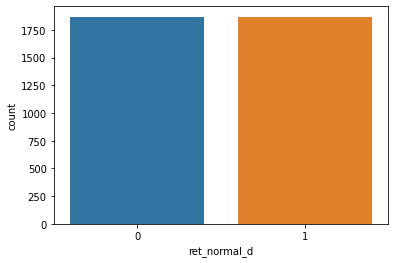

In [21]:
import seaborn as sns
sns.countplot(x='ret_normal_d', data=df_norm1)
print(mean(df_norm1.ret_normal_d))
show()

In [37]:
%%time
#TRAIN THE MODEL
train_data, test_data = train_test_split(df_norm1, test_size=0.3, random_state=42)
print("Train size =",train_data.shape," | Test size =",test_data.shape)

params = {'eval_metric': 'f1'}
predictor1_1 = TabularPredictor(label = 'ret_normal_d',eval_metric='f1').fit(train_data=train_data,  hyperparameters='multimodal') 
performance1_1 = predictor1_1.evaluate(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20220602_224050/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220602_224050/"
AutoGluon Version:  0.1.0
Train Data Rows:    2616
Train Data Columns: 27
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...


Train size = (2616, 28)  | Test size = (1122, 28)


	Available Memory:                    6948.7 MB
	Train Data (Original)  Memory Usage: 376.86 MB (5.4% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting IdentityFeatureGenerator...
			Fitting RenameFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
		Fitting TextSpecialFeatureGenerator...
			Fitting BinnedFeatureGenerator...
			Fit

[22:52:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


	0.5451	 = Validation f1 score
	80.33s	 = Training runtime
	0.42s	 = Validation runtime
Fitting model: NeuralNetMXNet ...
	0.5914	 = Validation f1 score
	6.64s	 = Training runtime
	0.18s	 = Validation runtime
Fitting model: LightGBMLarge ...
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	0.5486	 = Validation f1 score
	59.77s	 = Training runtime
	0.08s	 = Validation runtime
Fitting model: TextNeuralNetwork ...
		No GPU is detected in the machine and we will not proceed to run TextPredictor because they will train too slowly with only CPU. You may try to set `ngpus_per_trial` to a number larger than 0 when calling `.fit()`. Also, you can set the environment variable "AUTOGLUON_TEXT_TRAIN_WITHOUT_

Predictive performance on given data: f1 = 0.7832217130771942
CPU times: user 18min 30s, sys: 17 s, total: 18min 47s
Wall time: 17min 56s


In [38]:
# TEST OUT-OF-SAMPLE
y_test = test_data['ret_normal_d']
test_data_nolabel = test_data.drop(labels=['ret_normal_d'],axis=1)
y_pred = predictor1_1.predict(test_data_nolabel)
perf1_1 = predictor1_1.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [39]:
print('F1 score of training data set:' + str(performance1_1))
print('F1 score of test data set:' + str(perf1_1['f1_score']))

F1 score of training data set:0.7832217130771942
F1 score of test data set:0.5222816399286988


In [40]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[226, 200],
       [336, 360]])

In [ ]:
predictor.feature_importance(test_data)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arra

,importance,stddev,p_value,n,p99_high,p99_low
clean_text,0.009897,0.024147,0.275684,3,0.148265,-0.128470
risk,0.002452,0.002063,0.087870,3,0.014273,-0.009369
negative,0.002331,0.005579,0.272240,3,0.034300,-0.029638
ret_normal_d-4,0.000755,0.001090,0.176643,3,0.007000,-0.005491
ret_normal_d-5,0.000711,0.000385,0.042641,3,0.002916,-0.001494
ret_normal_d-2,0.000054,0.000499,0.433980,3,0.002911,-0.002803
sentiment,0.000000,0.000000,0.500000,3,0.000000,0.000000
fraud,0.000000,0.000000,0.500000,3,0.000000,0.000000
safe,0.000000,0.000000,0.500000,3,0.000000,0.000000
uncertainty,0.000000,0.000000,0.500000,3,0.000000,0.000000


#### - Predict the sum of normalized net stock price from day 0 to day 5 

In [26]:
df_norm2 = df_norm.drop(columns = ['norm_0to10','norm_0to15','ret_normal_d'])

In [27]:
size_diff = len(df_norm2[df_norm2['norm_0to5']==1]) - len(df_norm2[df_norm2["norm_0to5"]==0])
drop_indices = np.random.choice(df_norm2[df_norm2["norm_0to5"]==1].index, size_diff, replace=False)
df_norm2 = df_norm2.drop(drop_indices)

0.5


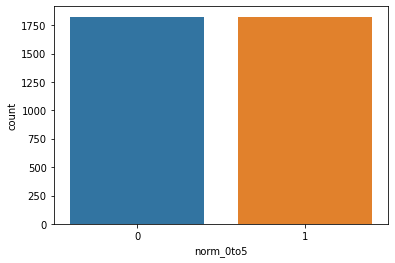

In [28]:
import seaborn as sns
sns.countplot(x='norm_0to5', data=df_norm2)
print(mean(df_norm2.norm_0to5))
show()

In [41]:
%%time
#TRAIN THE MODEL
train_data, test_data = train_test_split(df_norm2, test_size=0.3, random_state=42)
print("Train size =",train_data.shape," | Test size =",test_data.shape)

params = {'eval_metric': 'f1'}
predictor1_2 = TabularPredictor(label='norm_0to5',eval_metric='f1').fit(train_data=train_data,hyperparameters='multimodal')
performance1_2 = predictor1_2.evaluate(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20220602_230022/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220602_230022/"
AutoGluon Version:  0.1.0
Train Data Rows:    2553
Train Data Columns: 27
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11152.5 MB
	Train Data (Original)  Memory Usage: 392.01 MB (3.5% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes 

Train size = (2553, 28)  | Test size = (1095, 28)


	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting IdentityFeatureGenerator...
			Fitting RenameFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
		Fitting TextSpecialFeatureGenerator...
			Fitting BinnedFeatureGenerator...
			Fitting DropDuplicatesFeatureGenerator...
		Fitting TextNgramFeatureGenerator...
			Fitting CountVectorizer for text features: ['clean_text']
			CountVectorizer fit with vocabulary size = 10000
		Reducing Vectorizer vocab size from 10000 to 3803 to avoid OOM erro

[23:10:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


	0.5714	 = Validation f1 score
	87.55s	 = Training runtime
	0.43s	 = Validation runtime
Fitting model: NeuralNetMXNet ...
	0.6473	 = Validation f1 score
	6.1s	 = Training runtime
	0.17s	 = Validation runtime
Fitting model: LightGBMLarge ...
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	0.5212	 = Validation f1 score
	49.94s	 = Training runtime
	0.09s	 = Validation runtime
Fitting model: TextNeuralNetwork ...
		No GPU is detected in the machine and we will not proceed to run TextPredictor because they will train too slowly with only CPU. You may try to set `ngpus_per_trial` to a number larger than 0 when calling `.fit()`. Also, you can set the environment variable "AUTOGLUON_TEXT_TRAIN_WITHOUT_G

Predictive performance on given data: f1 = 0.7549347099908896
CPU times: user 17min 51s, sys: 16.9 s, total: 18min 8s
Wall time: 16min 12s


In [42]:
# TEST OUT-OF-SAMPLE
y_test = test_data['norm_0to5']
test_data_nolabel = test_data.drop(labels=['norm_0to5'],axis=1)
y_pred = predictor1_2.predict(test_data_nolabel)
perf1_2 = predictor1_2.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [43]:
print('F1 score of training data set:' + str(performance1_2))
print('F1 score of test data set:' + str(perf1_2['f1_score']))

F1 score of training data set:0.7549347099908896
F1 score of test data set:0.5004566210045662


In [32]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[261, 234],
       [292, 308]])

#### Predict the sum of normalized net stock price from day 0 to day 10

In [33]:
df_norm3 = df_norm.drop(columns = ['norm_0to15','ret_normal_d','norm_0to5'])

In [34]:
size_diff = len(df_norm3[df_norm3['norm_0to10']==1]) - len(df_norm3[df_norm3["norm_0to10"]==0])
drop_indices = np.random.choice(df_norm3[df_norm3["norm_0to10"]==1].index, size_diff, replace=False)
df_norm3 = df_norm3.drop(drop_indices)

0.5


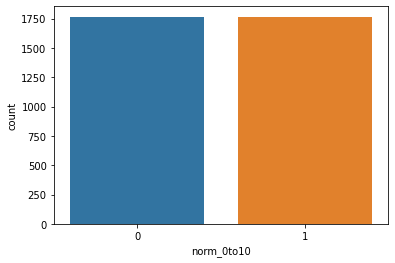

In [35]:
import seaborn as sns
sns.countplot(x='norm_0to10', data=df_norm3)
print(mean(df_norm3.norm_0to10))
show()

In [44]:
%%time
#TRAIN THE MODEL
train_data, test_data = train_test_split(df_norm3, test_size=0.3, random_state=42)
print("Train size =",train_data.shape," | Test size =",test_data.shape)

params = {'eval_metric': 'f1'}
predictor1_3 = TabularPredictor(label='norm_0to10',eval_metric='f1').fit(train_data=train_data,hyperparameters='multimodal')
performance1_3 = predictor1_3.evaluate(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20220602_231808/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220602_231808/"
AutoGluon Version:  0.1.0
Train Data Rows:    2471
Train Data Columns: 27
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11004.49 MB
	Train Data (Original)  Memory Usage: 375.96 MB (3.4% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes

Train size = (2471, 28)  | Test size = (1059, 28)


	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting IdentityFeatureGenerator...
			Fitting RenameFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
		Fitting TextSpecialFeatureGenerator...
			Fitting BinnedFeatureGenerator...
			Fitting DropDuplicatesFeatureGenerator...
		Fitting TextNgramFeatureGenerator...
			Fitting CountVectorizer for text features: ['clean_text']
			CountVectorizer fit with vocabulary size = 10000
		Reducing Vectorizer vocab size from 10000 to 3731 to avoid OOM erro

[23:27:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


	0.5743	 = Validation f1 score
	79.36s	 = Training runtime
	0.44s	 = Validation runtime
Fitting model: NeuralNetMXNet ...
	0.5746	 = Validation f1 score
	6.1s	 = Training runtime
	0.17s	 = Validation runtime
Fitting model: LightGBMLarge ...
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	0.5153	 = Validation f1 score
	111.24s	 = Training runtime
	0.08s	 = Validation runtime
Fitting model: TextNeuralNetwork ...
		No GPU is detected in the machine and we will not proceed to run TextPredictor because they will train too slowly with only CPU. You may try to set `ngpus_per_trial` to a number larger than 0 when calling `.fit()`. Also, you can set the environment variable "AUTOGLUON_TEXT_TRAIN_WITHOUT_

Predictive performance on given data: f1 = 0.921681780708986
CPU times: user 17min 53s, sys: 14.9 s, total: 18min 8s
Wall time: 16min 36s


In [45]:
# TEST OUT-OF-SAMPLE
y_test = test_data['norm_0to10']
test_data_nolabel = test_data.drop(labels=['norm_0to10'],axis=1)
y_pred = predictor1_3.predict(test_data_nolabel)
perf1_3 = predictor1_3.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [46]:
print('F1 score of training data set:' + str(performance1_3))
print('F1 score of test data set:' + str(perf1_3['f1_score']))

F1 score of training data set:0.921681780708986
F1 score of test data set:0.5401322001888574


In [47]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[301, 277],
       [210, 271]])

#### - Predict the sum of normalized net stock price from day 0 to day 15

In [48]:
df_norm4 = df_norm.drop(columns = ['ret_normal_d','norm_0to5','norm_0to10'])

In [49]:
size_diff = len(df_norm4[df_norm4['norm_0to15']==1]) - len(df_norm4[df_norm4['norm_0to15']==0])
drop_indices = np.random.choice(df_norm4[df_norm4['norm_0to15']==1].index, size_diff, replace=False)
df_norm4 = df_norm4.drop(drop_indices)

0.5


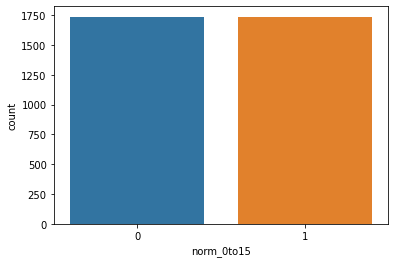

In [50]:
import seaborn as sns
sns.countplot(x='norm_0to15', data=df_norm4)
print(mean(df_norm4.norm_0to15))
show()

In [51]:
#TRAIN THE MODEL
train_data, test_data = train_test_split(df_norm4, test_size=0.3, random_state=42)
print("Train size =",train_data.shape," | Test size =",test_data.shape)

params = {'eval_metric': 'f1'}
predictor1_4 = TabularPredictor(label='norm_0to15',eval_metric='f1').fit(train_data=train_data,hyperparameters='multimodal')
performance1_4 = predictor1_4.evaluate(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20220602_233616/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220602_233616/"
AutoGluon Version:  0.1.0
Train Data Rows:    2431


Train size = (2431, 28)  | Test size = (1043, 28)


Train Data Columns: 27
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10931.27 MB
	Train Data (Original)  Memory Usage: 360.13 MB (3.3% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting IdentityFeatureGenerator...
			Fi

[23:45:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


	0.5477	 = Validation f1 score
	67.86s	 = Training runtime
	0.41s	 = Validation runtime
Fitting model: NeuralNetMXNet ...
	0.5561	 = Validation f1 score
	6.3s	 = Training runtime
	0.18s	 = Validation runtime
Fitting model: LightGBMLarge ...
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	0.572	 = Validation f1 score
	132.38s	 = Training runtime
	0.11s	 = Validation runtime
Fitting model: TextNeuralNetwork ...
		No GPU is detected in the machine and we will not proceed to run TextPredictor because they will train too slowly with only CPU. You may try to set `ngpus_per_trial` to a number larger than 0 when calling `.fit()`. Also, you can set the environment variable "AUTOGLUON_TEXT_TRAIN_WITHOUT_G

Predictive performance on given data: f1 = 0.8979919678714859


In [52]:
# TEST OUT-OF-SAMPLE
y_test = test_data['norm_0to15']
test_data_nolabel = test_data.drop(labels=['norm_0to15'],axis=1)
y_pred = predictor1_4.predict(test_data_nolabel)
perf1_4 = predictor1_4.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [53]:
print('F1 score of training data set:' + str(performance1_4))
print('F1 score of test data set:' + str(perf1_4['f1_score']))

F1 score of training data set:0.8979919678714859
F1 score of test data set:0.5254074784276127


In [54]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[228, 206],
       [289, 320]])

### Part2 - Market Return Analysis

#### Prepare for the data frame

In [ ]:
df_market=df.copy()
df_market.drop(columns = ['ret_normal_d','return_d'],inplace = True)

In [ ]:
for i in range(1,16):
  df_market.drop(columns = ['ret_normal_d-'+str(i),'ret_normal_d+'+str(i),'return_d-'+str(i),'return_d+'+str(i)],inplace =True)

In [ ]:
df_market.head(2)

In [58]:
#sum of normalized market return from day 0 to day 5
df_market['return_0to5'] =  df_market['return_mkt_d'] + sum(df_market['return_mkt_d+' + str(i)] for i in range(1,6))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


In [59]:
#sum of normalized market return from day 0 to day 10
df_market['return_0to10'] =  df_market['return_mkt_d'] + sum(df_market['return_mkt_d+' + str(i)] for i in range(1,11))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


In [60]:
#sum of normalized net return from day 0 to day 10
df_market['return_0to15'] =  df_market['return_mkt_d'] + sum(df_market['return_mkt_d+' + str(i)] for i in range(1,16))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


In [61]:
#drop normalized stock return from day 1 to day 15
for i in range(1,16):
  df_market = df_market.drop(columns = ['return_mkt_d+' + str(i)])

In [62]:
df_market.head(2)

,clean_text,return_mkt_d-15,return_mkt_d-14,return_mkt_d-13,return_mkt_d-12,return_mkt_d-11,return_mkt_d-10,return_mkt_d-9,return_mkt_d-8,return_mkt_d-7,return_mkt_d-6,return_mkt_d-5,return_mkt_d-4,return_mkt_d-3,return_mkt_d-2,return_mkt_d-1,return_mkt_d,positive,negative,certainty,uncertainty,risk,safe,litigious,fraud,sentiment,polarity,readability,return_0to5,return_0to10,return_0to15
0,Agilent Technologies (NYSE:A) F1Q11 Earnings C...,0.65,0.02,0.60,0.26,-1.88,0.71,1.751,-0.259,0.261,0.291,0.701,0.481,-0.309,0.121,0.671,0.301,0.078651,0.020513,0.028291,0.014486,0.017305,0.041610,0.021291,0.013902,0.103,0.586275,8.83,-1.094,-1.77,-0.39
1,Agilent Technologies (NYSE:A) Q2 2011 Earnings...,0.56,-0.16,0.89,0.66,0.32,0.29,-0.280,-0.500,-0.740,-0.820,0.460,0.550,0.860,-1.090,0.520,-0.880,0.081197,0.020513,0.028205,0.014209,0.016560,0.042201,0.021474,0.016667,0.125,0.596639,8.14,-1.240,-1.21,-4.88


In [63]:
df_market['return_mkt_d'] = df_market['return_mkt_d'].apply(lambda x: 1 if x>=0 else 0)
print(mean(df_market['return_mkt_d']))
df_market['return_0to5'] = df_market['return_0to5'].apply(lambda x: 1 if x>=0 else 0)
print(mean(df_market['return_0to5']))
df_market['return_0to10'] = df_market['return_0to10'].apply(lambda x: 1 if x>=0 else 0)
print(mean(df_market['return_0to10']))
df_market['return_0to15'] = df_market['return_0to15'].apply(lambda x: 1 if x>=0 else 0)
print(mean(df_market['return_0to15']))

0.5711654827676927
0.5887924230465666
0.6558800315706393
0.67008681925809


#### Predict Normalized Market Return of day 0

In [64]:
df_market1 = df_market.drop(columns = ['return_0to5','return_0to10','return_0to15'])

In [65]:
size_diff = len(df_market1[df_market1["return_mkt_d"]==1]) - len(df_market1[df_market1["return_mkt_d"]==0])
drop_indices = np.random.choice(df_market1[df_market1["return_mkt_d"]==1].index, size_diff, replace=False)
df_market1 = df_market1.drop(drop_indices)

0.5


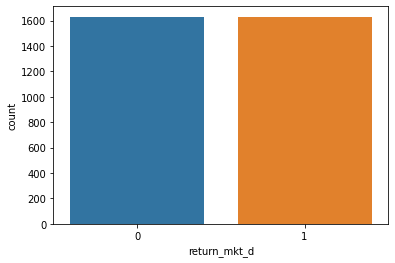

In [66]:
import seaborn as sns
sns.countplot(x='return_mkt_d', data=df_market1)
print(mean(df_market1.return_mkt_d))
show()

In [67]:
%%time
#TRAIN THE MODEL
train_data, test_data = train_test_split(df_market1, test_size=0.3, random_state=42)
print("Train size =",train_data.shape," | Test size =",test_data.shape)

params = {'eval_metric': 'f1'}
predictor2_1 = TabularPredictor(label='return_mkt_d',eval_metric='f1').fit(train_data=train_data,hyperparameters='multimodal')
performance2_1 = predictor2_1.evaluate(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20220602_235408/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220602_235408/"
AutoGluon Version:  0.1.0
Train Data Rows:    2282
Train Data Columns: 27
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...


Train size = (2282, 28)  | Test size = (978, 28)


Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10817.56 MB
	Train Data (Original)  Memory Usage: 351.99 MB (3.3% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting IdentityFeatureGenerator...
			Fitting RenameFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
		Fitting TextSpecialFeatureGenerator...

[00:05:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


	0.7555	 = Validation f1 score
	56.16s	 = Training runtime
	0.4s	 = Validation runtime
Fitting model: NeuralNetMXNet ...
	0.5708	 = Validation f1 score
	9.48s	 = Training runtime
	0.17s	 = Validation runtime
Fitting model: LightGBMLarge ...
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	0.8263	 = Validation f1 score
	95.84s	 = Training runtime
	0.09s	 = Validation runtime
Fitting model: TextNeuralNetwork ...
		No GPU is detected in the machine and we will not proceed to run TextPredictor because they will train too slowly with only CPU. You may try to set `ngpus_per_trial` to a number larger than 0 when calling `.fit()`. Also, you can set the environment variable "AUTOGLUON_TEXT_TRAIN_WITHOUT_G

Predictive performance on given data: f1 = 0.964471403812825
CPU times: user 18min 43s, sys: 20.4 s, total: 19min 3s
Wall time: 16min 54s


In [68]:
# TEST OUT-OF-SAMPLE
y_test = test_data['return_mkt_d']
test_data_nolabel = test_data.drop(labels=['return_mkt_d'],axis=1)
y_pred = predictor2_1.predict(test_data_nolabel)
perf2_1 = predictor2_1.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [69]:
print('F1 score of training data set:' + str(performance2_1))
print('F1 score of test data set:' + str(perf2_1['f1_score']))

F1 score of training data set:0.964471403812825
F1 score of test data set:0.7862985685071575


In [70]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[403, 116],
       [ 93, 366]])

#### Predict the sum of normalized market retur from day 0 to day 5 

In [71]:
df_market2 = df_market.drop(columns = ['return_mkt_d','return_0to10','return_0to15'])

In [72]:
size_diff = len(df_market2[df_market2["return_0to5"]==1]) - len(df_market2[df_market2["return_0to5"]==0])
drop_indices = np.random.choice(df_market2[df_market2["return_0to5"]==1].index, size_diff, replace=False)
df_market2 = df_market2.drop(drop_indices)

0.5


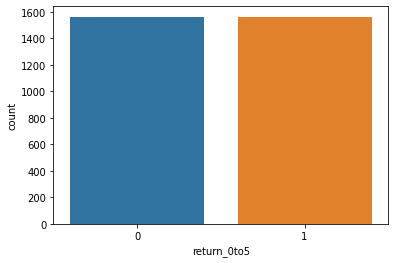

In [73]:
import seaborn as sns
sns.countplot(x='return_0to5', data=df_market2)
print(mean(df_market2.return_0to5))
show()

In [74]:
%%time
#TRAIN THE MODEL
train_data, test_data = train_test_split(df_market2, test_size=0.3, random_state=42)
print("Train size =",train_data.shape," | Test size =",test_data.shape)

params = {'eval_metric': 'f1'}
predictor2_2 = TabularPredictor(label='return_0to5',eval_metric='f1').fit(train_data=train_data,hyperparameters='multimodal')
performance2_2 = predictor2_2.evaluate(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20220603_001226/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220603_001226/"
AutoGluon Version:  0.1.0
Train Data Rows:    2188
Train Data Columns: 27
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])


Train size = (2188, 28)  | Test size = (938, 28)


Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10716.08 MB
	Train Data (Original)  Memory Usage: 332.96 MB (3.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting IdentityFeatureGenerator...
			Fitting RenameFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will

[00:23:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


	0.7381	 = Validation f1 score
	103.29s	 = Training runtime
	0.41s	 = Validation runtime
Fitting model: NeuralNetMXNet ...
	0.6	 = Validation f1 score
	13.94s	 = Training runtime
	0.18s	 = Validation runtime
Fitting model: LightGBMLarge ...
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	0.785	 = Validation f1 score
	77.24s	 = Training runtime
	0.1s	 = Validation runtime
Fitting model: TextNeuralNetwork ...
		No GPU is detected in the machine and we will not proceed to run TextPredictor because they will train too slowly with only CPU. You may try to set `ngpus_per_trial` to a number larger than 0 when calling `.fit()`. Also, you can set the environment variable "AUTOGLUON_TEXT_TRAIN_WITHOUT_GPU

Predictive performance on given data: f1 = 0.9607664233576642
CPU times: user 20min 33s, sys: 25.5 s, total: 20min 59s
Wall time: 17min 19s


In [75]:
# TEST OUT-OF-SAMPLE
y_test = test_data['return_0to5']
test_data_nolabel = test_data.drop(labels=['return_0to5'],axis=1)
y_pred = predictor2_2.predict(test_data_nolabel)
perf2_2 = predictor2_2.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [76]:
print('F1 score of training data set:' + str(performance2_2))
print('F1 score of test data set:' + str(perf2_2['f1_score']))

F1 score of training data set:0.9607664233576642
F1 score of test data set:0.7921108742004264


In [77]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[375,  89],
       [106, 368]])

#### Predict the sum of normalized stock return from day 0 to day 10


In [78]:
df_market3 = df_market.drop(columns = ['return_mkt_d','return_0to5','return_0to15'])

In [79]:
size_diff = len(df_market3[df_market3["return_0to10"]==1]) - len(df_market3[df_market3["return_0to10"]==0])
drop_indices = np.random.choice(df_market3[df_market3["return_0to10"]==1].index, size_diff, replace=False)
df_market3 = df_market3.drop(drop_indices)

0.5


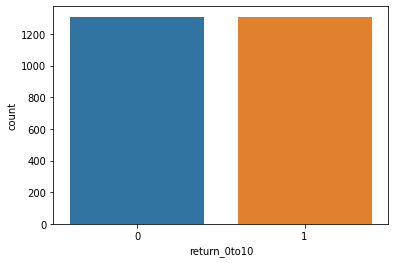

In [80]:
import seaborn as sns
sns.countplot(x='return_0to10', data=df_market3)
print(mean(df_market3.return_0to10))
show()

In [81]:
%%time
#TRAIN THE MODEL
train_data, test_data = train_test_split(df_market3, test_size=0.3, random_state=42)
print("Train size =",train_data.shape," | Test size =",test_data.shape)

params = {'eval_metric': 'f1'}
predictor2_3 = TabularPredictor(label='return_0to10',eval_metric='f1').fit(train_data=train_data,hyperparameters='multimodal')
performance2_3 = predictor2_3.evaluate(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20220603_003107/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220603_003107/"
AutoGluon Version:  0.1.0
Train Data Rows:    1831
Train Data Columns: 27
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...


Train size = (1831, 28)  | Test size = (785, 28)


Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10575.09 MB
	Train Data (Original)  Memory Usage: 273.68 MB (2.6% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting IdentityFeatureGenerator...
			Fitting RenameFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
		Fitting TextSpecialFeatureGenerator...

[00:38:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


	0.6423	 = Validation f1 score
	61.28s	 = Training runtime
	0.33s	 = Validation runtime
Fitting model: NeuralNetMXNet ...
	0.5661	 = Validation f1 score
	16.57s	 = Training runtime
	0.18s	 = Validation runtime
Fitting model: LightGBMLarge ...
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	0.6104	 = Validation f1 score
	90.78s	 = Training runtime
	0.08s	 = Validation runtime
Fitting model: TextNeuralNetwork ...
		No GPU is detected in the machine and we will not proceed to run TextPredictor because they will train too slowly with only CPU. You may try to set `ngpus_per_trial` to a number larger than 0 when calling `.fit()`. Also, you can set the environment variable "AUTOGLUON_TEXT_TRAIN_WITHOUT

Predictive performance on given data: f1 = 0.9395452024403772
CPU times: user 14min 6s, sys: 11.8 s, total: 14min 18s
Wall time: 12min 52s


In [82]:
# TEST OUT-OF-SAMPLE
y_test = test_data['return_0to10']
test_data_nolabel = test_data.drop(labels=['return_0to10'],axis=1)
y_pred = predictor2_3.predict(test_data_nolabel)
perf2_3 = predictor2_3.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [83]:
print('F1 score of training data set:' + str(performance2_3))
print('F1 score of test data set:' + str(perf2_3['f1_score']))

F1 score of training data set:0.9395452024403772
F1 score of test data set:0.7108280254777071


In [84]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[270, 121],
       [106, 288]])

#### Predict the sum of normalized net stock price from day 0 to day 15

In [85]:
df_market4 = df_market.drop(columns = ['return_0to5','return_0to10','return_mkt_d'])

In [86]:
size_diff = len(df_market4[df_market4["return_0to15"]==1]) - len(df_market4[df_market4["return_0to15"]==0])
drop_indices = np.random.choice(df_market4[df_market4["return_0to15"]==1].index, size_diff, replace=False)
df_market4 = df_market4.drop(drop_indices)

0.5


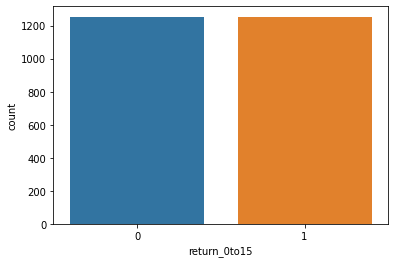

In [87]:
import seaborn as sns
sns.countplot(x='return_0to15', data=df_market4)
print(mean(df_market4.return_0to15))
show()

In [88]:
%%time
#TRAIN THE MODEL
train_data, test_data = train_test_split(df_market4, test_size=0.3, random_state=42)
print("Train size =",train_data.shape," | Test size =",test_data.shape)

params = {'eval_metric': 'f1'}
predictor2_4 = TabularPredictor(label='return_0to15',eval_metric='f1').fit(train_data=train_data,hyperparameters='multimodal')
performance2_4 = predictor2_4.evaluate(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20220603_004506/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220603_004506/"
AutoGluon Version:  0.1.0
Train Data Rows:    1755
Train Data Columns: 27
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...


Train size = (1755, 28)  | Test size = (753, 28)


	Available Memory:                    10534.16 MB
	Train Data (Original)  Memory Usage: 253.21 MB (2.4% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting IdentityFeatureGenerator...
			Fitting RenameFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
		Fitting TextSpecialFeatureGenerator...
			Fitting BinnedFeatureGenerator...
			F

[00:53:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


	0.6988	 = Validation f1 score
	74.82s	 = Training runtime
	0.33s	 = Validation runtime
Fitting model: NeuralNetMXNet ...
	0.6161	 = Validation f1 score
	4.78s	 = Training runtime
	0.18s	 = Validation runtime
Fitting model: LightGBMLarge ...
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	0.7257	 = Validation f1 score
	113.97s	 = Training runtime
	0.12s	 = Validation runtime
Fitting model: TextNeuralNetwork ...
		No GPU is detected in the machine and we will not proceed to run TextPredictor because they will train too slowly with only CPU. You may try to set `ngpus_per_trial` to a number larger than 0 when calling `.fit()`. Also, you can set the environment variable "AUTOGLUON_TEXT_TRAIN_WITHOUT

Predictive performance on given data: f1 = 0.9493243243243243
CPU times: user 17min 11s, sys: 21.2 s, total: 17min 32s
Wall time: 14min 35s


In [89]:
# TEST OUT-OF-SAMPLE
y_test = test_data['return_0to15']
test_data_nolabel = test_data.drop(labels=['return_0to15'],axis=1)
y_pred = predictor2_4.predict(test_data_nolabel)
perf2_4 = predictor2_4.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [91]:
print('F1 score of training data set:' + str(performance2_4))
print('F1 score of test data set:' + str(perf2_4['f1_score']))

F1 score of training data set:0.9493243243243243
F1 score of test data set:0.7330677290836654


In [92]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[294, 103],
       [ 98, 258]])

### Part3 - Stock Return Analysis

In [93]:
df_stock = df.copy()
df_stock.drop(columns = ['ret_normal_d','return_mkt_d'],inplace=True)

In [94]:
for i in range(1,16):
  df_stock.drop(columns = ['ret_normal_d-'+str(i),'ret_normal_d+'+str(i),'return_mkt_d+'+str(i)],inplace=True)

In [95]:
df_stock.head(2)

,clean_text,return_mkt_d-15,return_mkt_d-14,return_mkt_d-13,return_mkt_d-12,return_mkt_d-11,return_mkt_d-10,return_mkt_d-9,return_mkt_d-8,return_mkt_d-7,return_mkt_d-6,return_mkt_d-5,return_mkt_d-4,return_mkt_d-3,return_mkt_d-2,return_mkt_d-1,return_d-15,return_d-14,return_d-13,return_d-12,return_d-11,return_d-10,return_d-9,return_d-8,return_d-7,return_d-6,return_d-5,return_d-4,return_d-3,return_d-2,return_d-1,return_d,return_d+1,return_d+2,return_d+3,return_d+4,return_d+5,return_d+6,return_d+7,return_d+8,return_d+9,return_d+10,return_d+11,return_d+12,return_d+13,return_d+14,return_d+15,positive,negative,certainty,uncertainty,risk,safe,litigious,fraud,sentiment,polarity,readability
0,Agilent Technologies (NYSE:A) F1Q11 Earnings C...,0.65,0.02,0.60,0.26,-1.88,0.71,1.751,-0.259,0.261,0.291,0.701,0.481,-0.309,0.121,0.671,1.5673,-0.1871,-0.2811,-0.2819,-3.4629,2.0742,0.5259,-1.9501,-0.5821,4.8792,3.3729,-0.6076,-1.6753,1.3125,2.3182,-0.5109,-4.7779,2.1571,0.8033,0.0000,-3.2559,-4.8011,1.7305,2.9405,-0.6610,-3.3270,1.9174,3.2803,9.178,-1.8824,0.2180,0.078651,0.020513,0.028291,0.014486,0.017305,0.041610,0.021291,0.013902,0.103,0.586275,8.83
1,Agilent Technologies (NYSE:A) Q2 2011 Earnings...,0.56,-0.16,0.89,0.66,0.32,0.29,-0.280,-0.500,-0.740,-0.820,0.460,0.550,0.860,-1.090,0.520,1.4391,-2.3510,2.5322,1.2753,0.5797,-0.8148,1.0619,0.3172,-2.1739,-0.6667,1.1389,0.3016,1.5838,-1.2631,0.5996,4.4705,-0.4945,-2.1980,1.0944,-1.1019,-0.8991,-3.1558,-0.8350,0.6778,0.7548,0.4252,0.5444,-3.7497,0.375,-1.5567,-0.7801,0.081197,0.020513,0.028205,0.014209,0.016560,0.042201,0.021474,0.016667,0.125,0.596639,8.14


In [96]:
#sum of normalized net return from day 0 to day 5
df_stock['stock_0to5'] =  df_stock['return_d'] + sum(df_stock['return_d+' + str(i)] for i in range(1,6))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


In [97]:
#sum of normalized net return from day 0 to day 10
df_stock['stock_0to10'] =  df_stock['return_d'] + sum(df_stock['return_d+' + str(i)] for i in range(1,11))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


In [98]:
#sum of normalized net return from day 0 to day 15
df_stock['stock_0to15'] =  df_stock['return_d'] + sum(df_stock['return_d+' + str(i)] for i in range(1,16))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


In [99]:
df_stock['stock_d'] = df_stock['return_d'].apply(lambda x: 1 if x>=0 else 0)
print(mean(df_stock['stock_d']))
df_stock['stock_0to5'] = df_stock['stock_0to5'].apply(lambda x: 1 if x>=0 else 0)
print(mean(df_stock['stock_0to5']))
df_stock['stock_0to10'] = df_stock['stock_0to10'].apply(lambda x: 1 if x>=0 else 0)
print(mean(df_stock['stock_0to10']))
df_stock['stock_0to15'] = df_stock['stock_0to15'].apply(lambda x: 1 if x>=0 else 0)
print(mean(df_stock['stock_0to15']))

0.5243357011312813
0.5524861878453039
0.5808997632202052
0.6035253880557748


In [100]:
#drop normalized stock return from day 1 to day 15
for i in range(1,16):
  df_stock = df_stock.drop(columns = ['return_d+' + str(i)])


In [101]:
df_stock = df_stock.drop(columns = ['return_d'])


#### Predict the stock return of day 0

In [102]:
df_stock1 = df_stock.drop(columns = ['stock_0to5','stock_0to10','stock_0to15'])

In [103]:
size_diff = len(df_stock1[df_stock1["stock_d"]==1]) - len(df_stock1[df_stock1["stock_d"]==0])
drop_indices = np.random.choice(df_stock1[df_stock1["stock_d"]==1].index, size_diff, replace=False)
df_stock1 = df_stock1.drop(drop_indices)


0.5


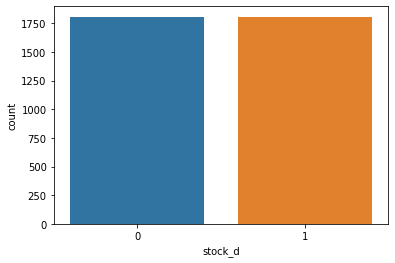

In [104]:
import seaborn as sns
sns.countplot(x='stock_d', data=df_stock1)
print(mean(df_stock1.stock_d))
show()


In [105]:
%%time
#TRAIN THE MODEL
train_data, test_data = train_test_split(df_stock1, test_size=0.3, random_state=42)
print("Train size =",train_data.shape," | Test size =",test_data.shape)

params = {'eval_metric': 'f1'}
predictor3_1 = TabularPredictor(label='stock_d',eval_metric='f1').fit(train_data=train_data,hyperparameters='multimodal')
performance3_1 = predictor3_1.evaluate(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20220603_023833/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220603_023833/"
AutoGluon Version:  0.1.0
Train Data Rows:    2531
Train Data Columns: 42
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10683.45 MB
	Train Data (Original)  Memory Usage: 380.96 MB (3.6% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes

Train size = (2531, 43)  | Test size = (1085, 43)


	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting IdentityFeatureGenerator...
			Fitting RenameFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
		Fitting TextSpecialFeatureGenerator...
			Fitting BinnedFeatureGenerator...
			Fitting DropDuplicatesFeatureGenerator...
		Fitting TextNgramFeatureGenerator...
			Fitting CountVectorizer for text features: ['clean_text']
			CountVectorizer fit with vocabulary size = 10000
		Reducing Vectorizer vocab size from 10000 to 3320 to avoid OOM erro

[02:52:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


	0.5444	 = Validation f1 score
	127.66s	 = Training runtime
	0.41s	 = Validation runtime
Fitting model: NeuralNetMXNet ...
	0.6466	 = Validation f1 score
	6.8s	 = Training runtime
	0.2s	 = Validation runtime
Fitting model: LightGBMLarge ...
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	0.5404	 = Validation f1 score
	49.0s	 = Training runtime
	0.07s	 = Validation runtime
Fitting model: TextNeuralNetwork ...
		No GPU is detected in the machine and we will not proceed to run TextPredictor because they will train too slowly with only CPU. You may try to set `ngpus_per_trial` to a number larger than 0 when calling `.fit()`. Also, you can set the environment variable "AUTOGLUON_TEXT_TRAIN_WITHOUT_GP

Predictive performance on given data: f1 = 0.6853672643146327
CPU times: user 21min 33s, sys: 18.1 s, total: 21min 51s
Wall time: 20min 53s


In [106]:
# TEST OUT-OF-SAMPLE
y_test = test_data['stock_d']
test_data_nolabel = test_data.drop(labels=['stock_d'],axis=1)
y_pred = predictor3_1.predict(test_data_nolabel)
perf3_1 = predictor3_1.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [107]:
print('F1 score of training data set:' + str(performance3_1))
print('F1 score of test data set:' + str(perf3_1['f1']))

F1 score of training data set:0.6853672643146327
F1 score of test data set:0.6462765957446809


In [108]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[ 67,  59],
       [473, 486]])

In [ ]:
predictor.feature_importance(test_data)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arra

,importance,stddev,p_value,n,p99_high,p99_low
clean_text,0.024798,0.003081,0.002553,3,0.042454,0.007143
return_mkt_d-14,0.007823,0.003795,0.035134,3,0.029566,-0.013921
return_d-3,0.006661,0.003237,0.035253,3,0.025209,-0.011888
return_mkt_d-3,0.006645,0.011302,0.207822,3,0.071409,-0.058118
litigious,0.006223,0.002299,0.021296,3,0.019394,-0.006948
return_mkt_d-15,0.004744,0.003291,0.064949,3,0.023604,-0.014116
return_d-1,0.004638,0.003500,0.074307,3,0.024694,-0.015417
uncertainty,0.004482,0.001971,0.029421,3,0.015775,-0.006812
return_mkt_d-1,0.003814,0.002189,0.047246,3,0.016359,-0.008730
certainty,0.003814,0.005458,0.174892,3,0.035091,-0.027463


#### Drop the text and NLP scores, without hyperparameter tuning

In [109]:
df_stock11 = df_stock1.drop(columns = ["clean_text",'positive','negative','certainty','uncertainty','risk','safe','litigious','fraud',\
                                       'sentiment','polarity','readability'])

0.5


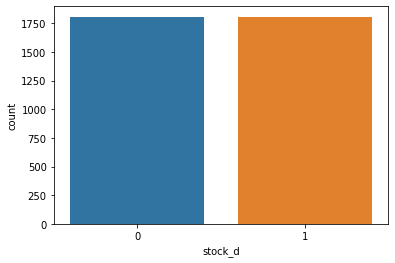

In [110]:
import seaborn as sns
sns.countplot(x='stock_d', data=df_stock11)
print(mean(df_stock11.stock_d))
show()

In [111]:
%%time
#TRAIN THE MODEL
train_data, test_data = train_test_split(df_stock11, test_size=0.3, random_state=42)
print("Train size =",train_data.shape," | Test size =",test_data.shape)

params = {'eval_metric': 'f1'}
predictor3_11 = TabularPredictor(label='stock_d',eval_metric='f1').fit(train_data=train_data)
performance3_11 = predictor3_11.evaluate(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20220603_030104/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220603_030104/"
AutoGluon Version:  0.1.0
Train Data Rows:    2531
Train Data Columns: 30
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10216.99 MB
	Train Data (Original)  Memory Usage: 0.61 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes o

Train size = (2531, 31)  | Test size = (1085, 31)


	Types of features in original data (raw dtype, special dtypes):
		('float', []) : 30 | ['return_mkt_d-15', 'return_mkt_d-14', 'return_mkt_d-13', 'return_mkt_d-12', 'return_mkt_d-11', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('float', []) : 30 | ['return_mkt_d-15', 'return_mkt_d-14', 'return_mkt_d-13', 'return_mkt_d-12', 'return_mkt_d-11', ...]
	0.1s = Fit runtime
	30 features in original data used to generate 30 features in processed data.
	Train Data (Processed) Memory Usage: 0.61 MB (0.0% of available memory)
Data preprocessing and feature engineering runtime = 0.2s ...
AutoGluon will gauge predictive performance using evaluation metric: 'f1'
	To change this, specify the eval_metric argument of fit()
Automatically generating train/validation split with holdout_frac=0.19755037534571315, Train Rows: 2031, Val Rows: 500
Fitting model: RandomForestGini ...
	0.5939	 = Validation f1 score
	2.58s	 = Training runtime
	0.21s	 = Validation runtime
Fitting model

[03:01:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


	0.6013	 = Validation f1 score
	4.14s	 = Training runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetMXNet ...
	0.5684	 = Validation f1 score
	5.12s	 = Training runtime
	0.18s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
/usr/local/lib/python3.7/dist-packages/nbconvert/filters/strings.py:22: DeprecationWarning: defusedxml.cElementTree is deprecated, import from defusedxml.ElementTree instead.
  from defusedxml import cElementTree as ElementTree


	0.6022	 = Validation f1 score
	20.35s	 = Training runtime
	0.24s	 = Validation runtime
Fitting model: LightGBMLarge ...
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	0.5637	 = Validation f1 score
	4.49s	 = Training runtime
	0.01s	 = Validation runtime


Fitting model: WeightedEnsemble_L2 ...
	0.6066	 = Validation f1 score
	1.88s	 = Training runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 56.73s ...
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20220603_030104/")


Predictive performance on given data: f1 = 0.8322701688555347
CPU times: user 52.9 s, sys: 6.88 s, total: 59.8 s
Wall time: 58.3 s


In [112]:
# TEST OUT-OF-SAMPLE
y_test = test_data['stock_d']
test_data_nolabel = test_data.drop(labels=['stock_d'],axis=1)
y_pred = predictor3_11.predict(test_data_nolabel)
perf3_11 = predictor3_11.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: f1 on test data: 0.5493197278911565
Evaluations on test data:
{
    "f1": 0.5493197278911565,
    "accuracy_score": 0.511520737327189,
    "balanced_accuracy_score": 0.5111450900441726,
    "matthews_corrcoef": 0.022592594227283786,
    "f1_score": 0.511520737327189
}
Detailed (per-class) classification report:
{
    "0": {
        "precision": 0.5110132158590308,
        "recall": 0.42962962962962964,
        "f1-score": 0.4668008048289739,
        "support": 540
    },
    "1": {
        "precision": 0.5118858954041204,
        "recall": 0.5926605504587156,
        "f1-score": 0.5493197278911565,
        "support": 545
    },
    "accuracy": 0.511520737327189,
    "macro avg": {
        "precision": 0.5114495556315757,
        "recall": 0.5111450900441726,
        "f1-score": 0.5080602663600652,
        "support": 1085
    },
    "weighted avg": {
        "precision": 0.5114515664139376,
        "recall": 0.511520737327189,
        "f1-score": 0.5082504021274896,
        

In [113]:
print('F1 score of training data set:' + str(performance3_11))
print('F1 score of test data set:' + str(perf3_11['f1']))

F1 score of training data set:0.8322701688555347
F1 score of test data set:0.5493197278911565


In [114]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[232, 222],
       [308, 323]])

#### - Predict the sum of stock return from day 0 to day 5 

In [115]:
df_stock2 = df_stock.drop(columns = ['stock_d','stock_0to10','stock_0to15'])

In [116]:
size_diff = len(df_stock2[df_stock2["stock_0to5"]==1]) - len(df_stock2[df_stock2["stock_0to5"]==0])
drop_indices = np.random.choice(df_stock2[df_stock2["stock_0to5"]==1].index, size_diff, replace=False)
df_stock2 = df_stock2.drop(drop_indices)

0.5


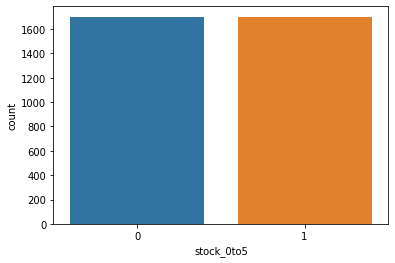

In [117]:
import seaborn as sns
sns.countplot(x='stock_0to5', data=df_stock2)
print(mean(df_stock2.stock_0to5))
show()


In [118]:
%%time
#TRAIN THE MODEL
train_data, test_data = train_test_split(df_stock2, test_size=0.3, random_state=42)
print("Train size =",train_data.shape," | Test size =",test_data.shape)

params = {'eval_metric': 'f1'}
predictor3_2 = TabularPredictor(label='stock_0to5',eval_metric='f1').fit(train_data=train_data,hyperparameters='multimodal')
performance3_2 = predictor3_2.evaluate(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20220603_030204/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220603_030204/"
AutoGluon Version:  0.1.0
Train Data Rows:    2381
Train Data Columns: 42
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...


Train size = (2381, 43)  | Test size = (1021, 43)


	Available Memory:                    10528.49 MB
	Train Data (Original)  Memory Usage: 350.04 MB (3.3% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting IdentityFeatureGenerator...
			Fitting RenameFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
		Fitting TextSpecialFeatureGenerator...
			Fitting BinnedFeatureGenerator...
			F

[03:11:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


	0.5573	 = Validation f1 score
	111.03s	 = Training runtime
	0.4s	 = Validation runtime
Fitting model: NeuralNetMXNet ...
	0.5894	 = Validation f1 score
	7.46s	 = Training runtime
	0.21s	 = Validation runtime
Fitting model: LightGBMLarge ...
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	0.5938	 = Validation f1 score
	41.91s	 = Training runtime
	0.1s	 = Validation runtime
Fitting model: TextNeuralNetwork ...
		No GPU is detected in the machine and we will not proceed to run TextPredictor because they will train too slowly with only CPU. You may try to set `ngpus_per_trial` to a number larger than 0 when calling `.fit()`. Also, you can set the environment variable "AUTOGLUON_TEXT_TRAIN_WITHOUT_G

Predictive performance on given data: f1 = 0.6629732225300092
CPU times: user 17min 6s, sys: 13.5 s, total: 17min 19s
Wall time: 15min 15s


In [119]:
# TEST OUT-OF-SAMPLE
y_test = test_data['stock_0to5']
test_data_nolabel = test_data.drop(labels=['stock_0to5'],axis=1)
y_pred = predictor3_2.predict(test_data_nolabel)
perf3_2 = predictor3_2.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [120]:
print('F1 score of training data set:' + str(performance3_2))
print('F1 score of test data set:' + str(perf3_2['f1']))

F1 score of training data set:0.6629732225300092
F1 score of test data set:0.6357039187227866


In [121]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[ 81,  52],
       [450, 438]])

#### Drop the text columns and NLP scores, without hyperparameter options

In [122]:
df_stock22 = df_stock2.copy()

In [123]:
df_stock22.drop(columns = ['clean_text','positive','negative','certainty','uncertainty','risk','safe','litigious',\
                           'fraud','sentiment','polarity','readability'],inplace=True)

In [124]:
%%time
#TRAIN THE MODEL
train_data, test_data = train_test_split(df_stock22, test_size=0.3, random_state=42)
print("Train size =",train_data.shape," | Test size =",test_data.shape)

params = {'eval_metric': 'f1'}
predictor3_22 = TabularPredictor(label='stock_0to5',eval_metric='f1').fit(train_data=train_data)
performance3_22 = predictor3_22.evaluate(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20220603_031850/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220603_031850/"
AutoGluon Version:  0.1.0
Train Data Rows:    2381
Train Data Columns: 30
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10109.87 MB
	Train Data (Original)  Memory Usage: 0.57 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes o

Train size = (2381, 31)  | Test size = (1021, 31)


	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('float', []) : 30 | ['return_mkt_d-15', 'return_mkt_d-14', 'return_mkt_d-13', 'return_mkt_d-12', 'return_mkt_d-11', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('float', []) : 30 | ['return_mkt_d-15', 'return_mkt_d-14', 'return_mkt_d-13', 'return_mkt_d-12', 'return_mkt_d-11', ...]
	0.1s = Fit runtime
	30 features in original data used to generate 30 features in processed data.
	Train Data (Processed) Memory Usage: 0.57 MB (0.0% of available memory)
Data preprocessing and feature engineering runtime = 0.2s ...
AutoGluon will gauge predictive performance using evaluation metric: 'f1'
	To change this, specify the eval_metric argument of fit()
Automatically generating train/validation split with holdout_frac=0.2, Train Rows: 1904, Val Rows: 477
Fitting model: RandomForestGini 

[03:19:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


	0.5788	 = Validation f1 score
	16.13s	 = Training runtime
	0.02s	 = Validation runtime
Fitting model: NeuralNetMXNet ...
	0.5927	 = Validation f1 score
	5.8s	 = Training runtime
	0.2s	 = Validation runtime
Fitting model: NeuralNetFastAI ...


	0.593	 = Validation f1 score
	16.26s	 = Training runtime
	0.24s	 = Validation runtime
Fitting model: LightGBMLarge ...
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	0.59	 = Validation f1 score
	3.48s	 = Training runtime
	0.0s	 = Validation runtime


Fitting model: WeightedEnsemble_L2 ...
	0.6756	 = Validation f1 score
	1.82s	 = Training runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 63.76s ...
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20220603_031850/")


Predictive performance on given data: f1 = 0.7262706674831598
CPU times: user 1min 13s, sys: 6.67 s, total: 1min 19s
Wall time: 1min 4s


In [125]:
# TEST OUT-OF-SAMPLE
y_test = test_data['stock_0to5']
test_data_nolabel = test_data.drop(labels=['stock_0to5'],axis=1)
y_pred = predictor3_22.predict(test_data_nolabel)
perf3_22 = predictor3_22.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: f1 on test data: 0.6227630637079457
Evaluations on test data:
{
    "f1": 0.6227630637079457,
    "accuracy_score": 0.4838393731635651,
    "balanced_accuracy_score": 0.49943310657596374,
    "matthews_corrcoef": -0.001798542257585353,
    "f1_score": 0.4838393731635651
}
Detailed (per-class) classification report:
{
    "0": {
        "precision": 0.5175438596491229,
        "recall": 0.1111111111111111,
        "f1-score": 0.1829457364341085,
        "support": 531
    },
    "1": {
        "precision": 0.4796030871003308,
        "recall": 0.8877551020408163,
        "f1-score": 0.6227630637079457,
        "support": 490
    },
    "accuracy": 0.4838393731635651,
    "macro avg": {
        "precision": 0.4985734733747268,
        "recall": 0.49943310657596374,
        "f1-score": 0.4028544000710271,
        "support": 1021
    },
    "weighted avg": {
        "precision": 0.4993352616580278,
        "recall": 0.4838393731635651,
        "f1-score": 0.3940235918348726,
  

In [126]:
print('F1 score of training data set:' + str(performance3_22))
print('F1 score of test data set:' + str(perf3_22['f1']))

F1 score of training data set:0.7262706674831598
F1 score of test data set:0.6227630637079457


In [127]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[ 59,  55],
       [472, 435]])

#### - Predict the sum of stock return from day 0 to day 10

In [128]:
df_stock3 = df_stock.drop(columns = ['stock_0to5','stock_d','stock_0to15'])

In [129]:
size_diff = len(df_stock3[df_stock3["stock_0to10"]==1]) - len(df_stock3[df_stock3["stock_0to10"]==0])
drop_indices = np.random.choice(df_stock3[df_stock3["stock_0to10"]==1].index, size_diff, replace=False)
df_stock3 = df_stock3.drop(drop_indices)

0.5


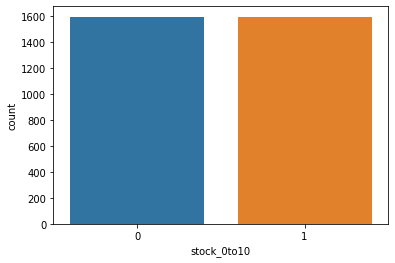

In [130]:
import seaborn as sns
sns.countplot(x='stock_0to10', data=df_stock3)
print(mean(df_stock3.stock_0to10))
show()

In [131]:
%%time
#TRAIN THE MODEL
train_data, test_data = train_test_split(df_stock3, test_size=0.3, random_state=42)
print("Train size =",train_data.shape," | Test size =",test_data.shape)

params = {'eval_metric': 'f1'}
predictor3_3 = TabularPredictor(label='stock_0to10',eval_metric='f1').fit(train_data=train_data,hyperparameters='multimodal')
performance3_3 = predictor3_3.evaluate(train_data)


No path specified. Models will be saved in: "AutogluonModels/ag-20220603_031954/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220603_031954/"
AutoGluon Version:  0.1.0
Train Data Rows:    2230
Train Data Columns: 42
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...


Train size = (2230, 43)  | Test size = (956, 43)


	Available Memory:                    10440.88 MB
	Train Data (Original)  Memory Usage: 332.53 MB (3.2% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting IdentityFeatureGenerator...
			Fitting RenameFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
		Fitting TextSpecialFeatureGenerator...
			Fitting BinnedFeatureGenerator...
			F

[03:29:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


	0.5877	 = Validation f1 score
	138.31s	 = Training runtime
	0.38s	 = Validation runtime
Fitting model: NeuralNetMXNet ...
	0.6552	 = Validation f1 score
	5.88s	 = Training runtime
	0.22s	 = Validation runtime
Fitting model: LightGBMLarge ...
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	0.6172	 = Validation f1 score
	41.23s	 = Training runtime
	0.06s	 = Validation runtime
Fitting model: TextNeuralNetwork ...
		No GPU is detected in the machine and we will not proceed to run TextPredictor because they will train too slowly with only CPU. You may try to set `ngpus_per_trial` to a number larger than 0 when calling `.fit()`. Also, you can set the environment variable "AUTOGLUON_TEXT_TRAIN_WITHOUT

Predictive performance on given data: f1 = 0.8596761757902853
CPU times: user 18min 2s, sys: 13.7 s, total: 18min 16s
Wall time: 15min 38s


In [132]:
# TEST OUT-OF-SAMPLE
y_test = test_data['stock_0to10']
test_data_nolabel = test_data.drop(labels=['stock_0to10'],axis=1)
y_pred = predictor3_3.predict(test_data_nolabel)
perf3_3 = predictor3_3.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [133]:
print('F1 score of training data set:' + str(performance3_3))
print('F1 score of test data set:' + str(perf3_3['f1']))

F1 score of training data set:0.8596761757902853
F1 score of test data set:0.6202723146747353


In [134]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[ 44,  49],
       [453, 410]])

#### Predict the sum of stock return from day 0 to day 15

In [135]:
df_stock4 = df_stock.drop(columns = ['stock_0to5','stock_0to10','stock_d'])

In [136]:
size_diff = len(df_stock4[df_stock4["stock_0to15"]==1]) - len(df_stock4[df_stock4["stock_0to15"]==0])
drop_indices = np.random.choice(df_stock4[df_stock4["stock_0to15"]==1].index, size_diff, replace=False)
df_stock4 = df_stock4.drop(drop_indices)

0.5


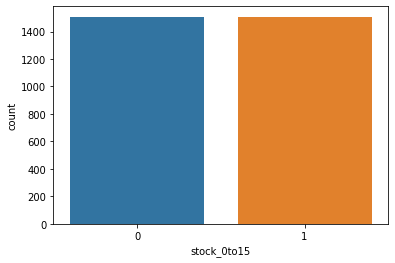

In [137]:
import seaborn as sns
sns.countplot(x='stock_0to15', data=df_stock4)
print(mean(df_stock4.stock_0to15))
show()

In [138]:
%%time
#TRAIN THE MODEL
train_data, test_data = train_test_split(df_stock4, test_size=0.3, random_state=42)
print("Train size =",train_data.shape," | Test size =",test_data.shape)

params = {'eval_metric': 'f1'}
predictor3_4 = TabularPredictor(label='stock_0to15',eval_metric='f1').fit(train_data=train_data,hyperparameters='multimodal')
performance3_4 = predictor3_4.evaluate(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20220603_033653/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220603_033653/"
AutoGluon Version:  0.1.0
Train Data Rows:    2109
Train Data Columns: 42
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...


Train size = (2109, 43)  | Test size = (905, 43)


	Available Memory:                    10318.25 MB
	Train Data (Original)  Memory Usage: 309.34 MB (3.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting IdentityFeatureGenerator...
			Fitting RenameFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
		Fitting TextSpecialFeatureGenerator...
			Fitting BinnedFeatureGenerator...
			F

[03:46:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


	0.5477	 = Validation f1 score
	52.82s	 = Training runtime
	0.35s	 = Validation runtime
Fitting model: NeuralNetMXNet ...
	0.6186	 = Validation f1 score
	5.4s	 = Training runtime
	0.21s	 = Validation runtime
Fitting model: LightGBMLarge ...
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	0.5499	 = Validation f1 score
	87.13s	 = Training runtime
	0.08s	 = Validation runtime
Fitting model: TextNeuralNetwork ...
		No GPU is detected in the machine and we will not proceed to run TextPredictor because they will train too slowly with only CPU. You may try to set `ngpus_per_trial` to a number larger than 0 when calling `.fit()`. Also, you can set the environment variable "AUTOGLUON_TEXT_TRAIN_WITHOUT_G

Predictive performance on given data: f1 = 0.7955002008838891
CPU times: user 16min 38s, sys: 14.8 s, total: 16min 53s
Wall time: 15min 21s


In [139]:
# TEST OUT-OF-SAMPLE
y_test = test_data['stock_0to15']
test_data_nolabel = test_data.drop(labels=['stock_0to15'],axis=1)
y_pred = predictor3_4.predict(test_data_nolabel)
perf3_4 = predictor3_4.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [140]:
print('F1 score of training data set:' + str(performance3_4))
print('F1 score of test data set:' + str(perf3_4['f1']))

F1 score of training data set:0.7955002008838891
F1 score of test data set:0.6742671009771988


In [141]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[ 91,  63],
       [337, 414]])